<a href="https://colab.research.google.com/github/Daniel170-siu/CIENCIA_DATOS/blob/main/Actividad_16_09_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Instalando libreiras
!pip install statsmodels

In [5]:
!pip install wquantiles

In [6]:
import pandas as pd #Manipulacion y analisis de datos
import numpy as np #Calculos matematicos
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns #graficas bonitas
import matplotlib.pyplot as plt #graficas

In [1]:
#Consiguiendo el dataset directamente desde google drive. Para ello,
#se debe dar permisos a colab de ingresar a google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ciencia de datos/base_aviacion_1.csv")

In [8]:
data.head()

,userid,gender,bookingchannel,cabinclass,complaints,flightdistance_new,ticketprice_new,departuretime_new,arrivaltime_new,flightduration_new,age_new
0,1,Male,Phone,Business,0,825,598,7,16,52,24
1,2,Male,Online,First,9,1843,2211,1,15,590,60
2,3,Female,Agency,First,2,5465,631,12,20,573,47
3,4,Female,Phone,First,3,4448,995,13,21,1161,38
4,5,Male,Agency,Business,2,817,1284,10,17,28,10


In [10]:
#Generando cálculos de desviación estándar y cuantiles
data["flightdistance_new"].std()

1446.0604990590039

In [14]:
#Calculando IQR
data.flightdistance_new.quantile(0.75)-data.flightdistance_new.quantile(0.25)

2030.0

In [16]:
robust.scale.mad(data["flightdistance_new"])

1676.081808020583

#EXPLORACIÓN EN LA DISTRIBUCIÓN DE DATOS

En este apartado se explorará:
###1. Diagrama de caja: Visibilización rápida de la distribución de datos.
###2. Diagrama de frecuencias: Registro de recuento de valores de datos numéricos que caen en un conjunto de intervalos.
###3. Histograma: Diagrama de la tabla de frecuencias con los intervalos en el eje x y el recuento (o proporción) en el eje y.
###4. Diagrama de densidad: Versión suavizada del histograma. A menudo basada en una **estimación de la densidad del núcleo (kernel density estimate**).

In [17]:
#Calculando percentiles de la tasa de edad
data["age_new"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

,age_new
0.05,3.45
0.25,12.00
0.50,28.00
0.75,41.25
0.95,60.00


Text(0, 0.5, 'flightdistance miles')

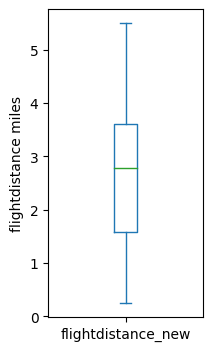

In [21]:
#Dibujando diagramas de caja
ax = (data.flightdistance_new/1_000).plot.box(figsize=(2,4))
ax.set_ylabel("flightdistance miles")

In [22]:
#Calculando la tabla de frecuencias e histogramas
binnedflightdistance_new=pd.cut(data["flightdistance_new"],10)
binnedflightdistance_new.value_counts()

,count
flightdistance_new,
"(774.9, 1299.8]",7
"(2349.6, 2874.5]",7
"(2874.5, 3399.4]",7
"(4974.1, 5499.0]",6
"(1299.8, 1824.7]",5
"(1824.7, 2349.6]",5
"(3399.4, 3924.3]",5
"(244.751, 774.9]",3
"(3924.3, 4449.2]",3


Text(0, 0.5, 'flightdistance miles')

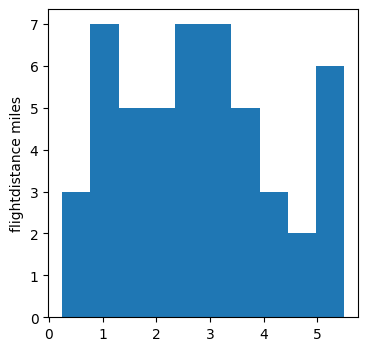

In [24]:
#Histograma de la distancia de vuelo:
ax = (data.flightdistance_new/1_000).plot.hist(figsize=(4,4))
ax.set_ylabel("flightdistance miles")

Text(0.5, 0, 'edad')

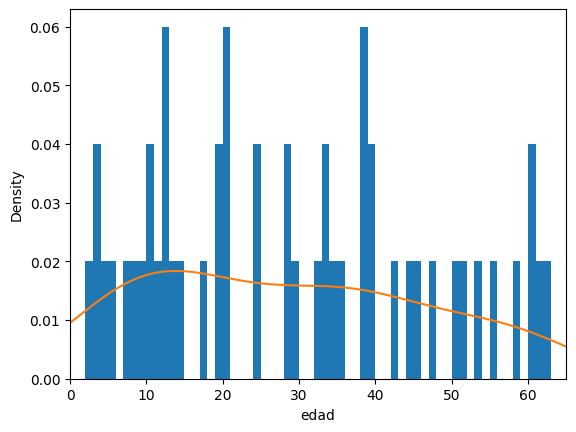

In [30]:
#Diagrama de dispersión y curva de densidad
ax=data["age_new"].plot.hist(density=True,xlim=[0,65],bins=range(1,70))
data["age_new"].plot.density(ax=ax)
ax.set_xlabel("edad")

#ACTIVIDAD

##1. Calcule las mismas métricas en su propio dataset.
##2. Responda las siguientes preguntas.

### Sobre Estimaciones de variabilidad
1.   Qué significa que la desviación estándar es casi dos veces mayor que la MAD?
2. Cómo puedo mejorar esta situación?
3. Explique el resultado obtenido al calcular IQR

### Sobre exploración en distribución de datos
1. Qué información nos suministra los percentiles de tasa de homicidios por estados?
2. Explique con sus propias palabras qué ionformación suministra el diagrama de caja con respecto a la tasa de homicidios por estado.
3. Cómo podría agregarse los estados que se encuentran en cada uno de los intervalos? Si no sabe la respuesta, complete la tabla de forma manual y postee su respuesta. Interprete los resultados obtenidos.
4. Explique el resultado obtenido por el diagrama de dispersión.

##Sobre Estimadores de variabilidad
1. R/ Que los datos probablemente contienen valores extremos que estan inflando la dispersion total medida por la desviacion estandar.

2. R/ Para mejorar esta situacion se pueden detectar los outliers para identificar los valores que se desvian de forma considerable del resto de los datos. Otra forma de mejorar esto tambien puede ser el usar metricas mas robustas.

3. R/ El resultado del IQR demuestra que la dispersión central de los datos en la columna Population es considerablemente grande.

##Sobre exploracion en distribucion de datos

1. R/ Los percentiles de la tasa de homicidios por estado nos proporcionan una visión más detallada de la distribución de los datos, permitiendo entender cómo se distribuyen las tasas de homicidios en distintos puntos de la población.

*Percentil 5% (1.600): El 5% de los estados tiene una tasa de homicidios menor o igual a 1.600.

*Percentil 25% (2.425): El 25% de los estados tiene una tasa de homicidios menor o igual a 2.425

*Percentil 50% (4.000): El 50% de los estados tiene una tasa de homicidios menor o igual a 4.000, lo que corresponde a la mediana.

*Percentil 75% (5.550): El 75% de los estados tiene una tasa de homicidios menor o igual a 5.550.

*Percentil 95% (6.510): El 95% de los estados tiene una tasa de homicidios menor o igual a 6.510.

2. R/ El diagrama de caja muestra que la mayoría de los estados tienen poblaciones entre 1 y 10 millones de habitantes, pero hay unos cuantos con poblaciones mucho mayores, lo que genera los outliers en el gráfico.

3. R/ analisis=estado.head()
g=sns.FacetGrid(analisis,col="State")
g.map(sns.distplot,"Murder.Rate")
Para agregar los estados que se encuentran en cada uno de los intervalos en el codigo estado.head(50) para tener la informacion de todos los estados que se encuentran en la base de datos y asi obtener los estados que se encuentran en cada uno de los intervalos

4. R/
*La mayoría de los estados (o regiones) tienen tasas de asesinatos relativamente bajas, concentrándose en un rango de entre 2 y 6 asesinatos por cada millón de habitantes.

*Hay menos regiones con tasas superiores a 6, lo que se refleja en las barras más bajas hacia la derecha y la disminución de la curva de densidad.